In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

In [57]:
# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [58]:
df_returns = pd.read_csv('data/returns.csv')
df_close = pd.read_csv('data/close.csv')
df_returns.head()

,AAVEUSDT,ADAUSDT,ALGOUSDT,ATOMUSDT,BCHUSDT,BNBUSDT,BTCUSDT,COMPUSDT,DOGEUSDT,DOTUSDT,EOSUSDT,ETCUSDT,ETHUSDT,FILUSDT,KSMUSDT,LINKUSDT,LTCUSDT,MATICUSDT,MKRUSDT,NEOUSDT,SOLUSDT,THETAUSDT,TRXUSDT,UNIUSDT,VETUSDT,XLMUSDT,XRPUSDT,XTZUSDT
0,-0.008507,0.002925,0.000000,0.002967,0.003518,0.000879,0.002309,0.009608,0.002637,0.005369,-0.003747,0.006832,0.001501,0.001841,0.010971,0.006016,0.001256,0.008701,0.002347,-0.000598,0.005292,0.000307,-0.000371,0.011399,0.004405,0.004495,0.001557,0.008696
1,0.001581,-0.005103,0.005371,-0.000925,0.001497,0.005657,0.002227,0.005383,0.000000,0.040167,0.001504,0.000000,0.003311,-0.003162,0.007937,0.006486,0.007884,0.004025,0.004733,0.001685,0.002219,-0.002452,0.004080,0.001856,0.002234,0.000707,0.003498,0.011797
2,0.024599,0.006870,0.006914,0.005367,-0.004157,0.004655,0.005345,-0.001721,0.005635,-0.012723,0.003380,0.005714,0.006720,-0.001629,-0.011324,0.002762,0.000356,0.004582,0.005444,0.006403,0.011999,0.004455,0.001108,-0.003243,0.020061,0.006472,0.000000,0.015247
3,-0.006210,0.001729,-0.005618,-0.002761,-0.001208,-0.003507,-0.003487,0.005555,0.000374,-0.010400,-0.001497,-0.002308,-0.001938,-0.023059,-0.001551,0.007929,-0.011196,-0.005131,-0.001623,-0.000647,-0.004529,-0.012236,-0.002214,-0.000133,-0.004613,0.005963,-0.003873,-0.004859
4,0.000172,0.000000,-0.006905,0.005354,0.000037,0.003261,0.000297,0.011430,0.000373,0.005483,0.000375,-0.001958,0.002014,-0.005670,-0.003424,0.008115,-0.002157,-0.001146,0.001476,0.000917,0.007054,0.005574,-0.001479,0.027157,0.010570,0.001627,0.004277,0.001775


In [59]:
df_returns.describe()

,AAVEUSDT,ADAUSDT,ALGOUSDT,ATOMUSDT,BCHUSDT,BNBUSDT,BTCUSDT,COMPUSDT,DOGEUSDT,DOTUSDT,EOSUSDT,ETCUSDT,ETHUSDT,FILUSDT,KSMUSDT,LINKUSDT,LTCUSDT,MATICUSDT,MKRUSDT,NEOUSDT,SOLUSDT,THETAUSDT,TRXUSDT,UNIUSDT,VETUSDT,XLMUSDT,XRPUSDT,XTZUSDT
count,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000
mean,0.000112,0.000105,0.000057,0.000093,0.000075,0.000137,0.000076,0.000065,0.000246,0.000082,0.000020,0.000123,0.000106,0.000029,0.000091,0.000076,0.000066,0.000216,0.000113,0.000061,0.000240,0.000119,0.000088,0.000124,0.000110,0.000077,0.000093,0.000042
std,0.013323,0.011270,0.012597,0.012903,0.011011,0.009355,0.006955,0.013125,0.015949,0.011835,0.011219,0.012310,0.008797,0.012289,0.013589,0.011649,0.010485,0.014524,0.011890,0.012061,0.014467,0.013277,0.009179,0.012894,0.012845,0.011969,0.012094,0.012004
min,-0.226765,-0.224386,-0.194922,-0.313760,-0.280380,-0.164481,-0.094254,-0.273921,-0.263372,-0.334011,-0.276467,-0.275387,-0.143181,-0.278148,-0.398873,-0.248793,-0.258360,-0.176471,-0.183769,-0.287265,-0.283531,-0.286997,-0.222425,-0.241645,-0.247540,-0.488242,-0.207744,-0.389622
25%,-0.005503,-0.004454,-0.005319,-0.005150,-0.003971,-0.003123,-0.002480,-0.005643,-0.004296,-0.004604,-0.004159,-0.004421,-0.003125,-0.004700,-0.005571,-0.004995,-0.003980,-0.005204,-0.004752,-0.004845,-0.005823,-0.005422,-0.002646,-0.005172,-0.005038,-0.004056,-0.003876,-0.004739
50%,0.000000,0.000000,0.000000,0.000086,0.000091,0.000162,0.000075,0.000107,0.000079,0.000000,0.000000,0.000064,0.000084,0.000000,0.000000,0.000132,0.000147,0.000000,0.000130,0.000111,0.000000,0.000135,0.000256,0.000063,0.000000,0.000178,0.000173,0.000000
75%,0.005663,0.004542,0.005571,0.005266,0.004108,0.003421,0.002653,0.005796,0.004362,0.004743,0.004488,0.004486,0.003390,0.004715,0.005705,0.005175,0.004192,0.005270,0.004937,0.005043,0.005887,0.005772,0.002965,0.005391,0.005266,0.004199,0.004000,0.004994
max,0.161978,0.159306,0.228885,0.248356,0.432869,0.149518,0.126653,0.292098,0.679489,0.220124,0.157872,0.231818,0.092547,0.173194,0.349365,0.122500,0.246825,0.356449,0.280327,0.219978,0.305243,0.193344,0.318559,0.546289,0.303068,0.572634,0.283029,0.259653


<Axes: >

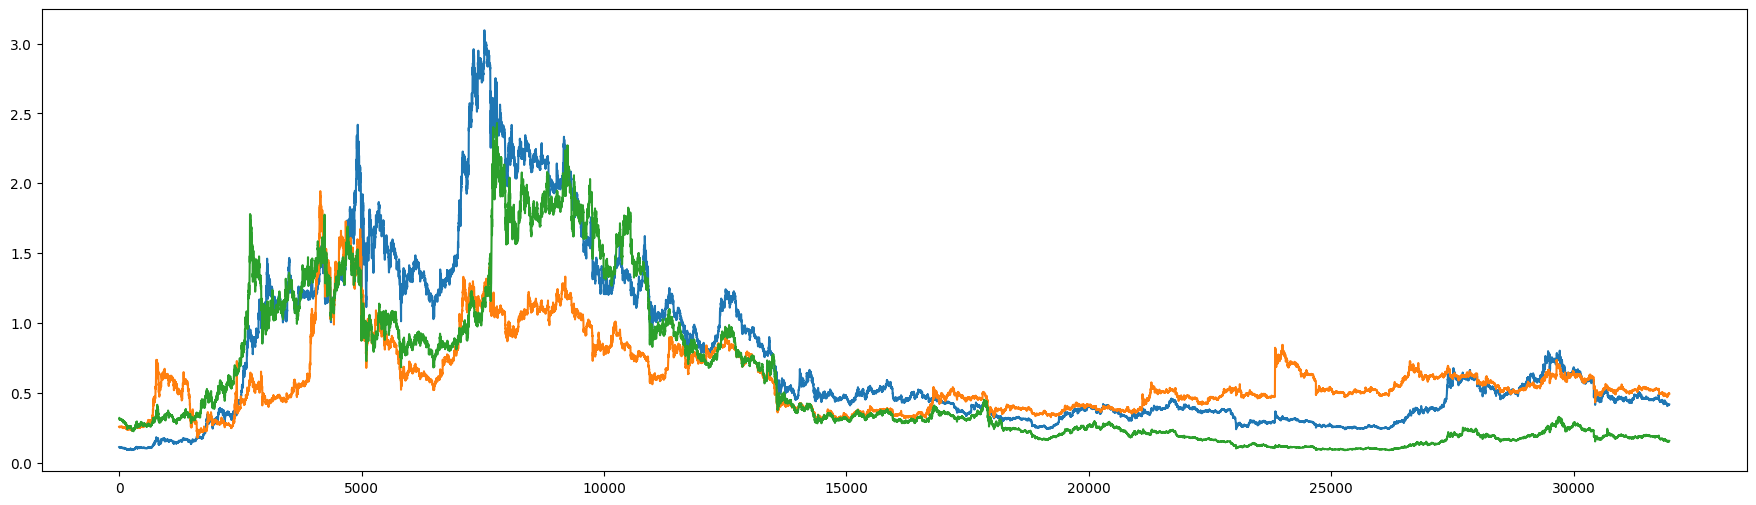

In [60]:
# It would be nice to show a better ploting then this one.

df_close['ADAUSDT'].plot(figsize=(22, 6))
df_close['XRPUSDT'].plot(figsize=(22, 6))
df_close['ALGOUSDT'].plot(figsize=(22, 6))

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df
# This would take a while to run...
# df_res = grangers_causation_matrix(df_returns, variables = df_returns.columns) 


In [66]:
df_res = pd.read_csv('results/p_values_matrix.csv')
print('''Check Granger Causality of all possible combinations of the Time series. 
The rows are the response variable, columns are predictors. The values in the table 
are the P-Values. P-Values lesser than the significance level (0.05), implies 
the Null Hypothesis that the coefficients of the corresponding past values is 
zero, that is, the X does not cause Y can be rejected.''')
df_res

,Unnamed: 0,AAVEUSDT_x,ADAUSDT_x,ALGOUSDT_x,ATOMUSDT_x,BCHUSDT_x,BNBUSDT_x,BTCUSDT_x,COMPUSDT_x,DOGEUSDT_x,DOTUSDT_x,EOSUSDT_x,ETCUSDT_x,ETHUSDT_x,FILUSDT_x,KSMUSDT_x,LINKUSDT_x,LTCUSDT_x,MATICUSDT_x,MKRUSDT_x,NEOUSDT_x,SOLUSDT_x,THETAUSDT_x,TRXUSDT_x,UNIUSDT_x,VETUSDT_x,XLMUSDT_x,XRPUSDT_x,XTZUSDT_x
0,AAVEUSDT_y,1.0000,0.0089,0.0014,0.0001,0.0000,0.0000,0.0000,0.0000,0.1814,0.0001,0.0000,0.0000,0.0000,0.4226,0.0018,0.0000,0.0051,0.0003,0.0000,0.0000,0.0280,0.0007,0.0000,0.0000,0.0000,0.0000,0.0001,0.0010
1,ADAUSDT_y,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0072,0.0000,0.0000,0.0000,0.0000,0.0040,0.0001,0.0000,0.0000,0.0000,0.0001,0.0000,0.0003,0.0000,0.0000,0.0000,0.0041,0.0000,0.0000,0.0000
2,ALGOUSDT_y,0.1408,0.0167,1.0000,0.0190,0.0000,0.0002,0.0000,0.0088,0.0099,0.0015,0.0011,0.0028,0.0000,0.1456,0.0620,0.0034,0.0728,0.0000,0.0007,0.0000,0.0004,0.0032,0.0000,0.0047,0.0000,0.0117,0.0264,0.0002
3,ATOMUSDT_y,0.0003,0.0095,0.0007,1.0000,0.0000,0.0000,0.0001,0.0012,0.0487,0.0005,0.0087,0.0367,0.0017,0.2506,0.0000,0.0009,0.0076,0.0000,0.0000,0.0004,0.0000,0.1036,0.0000,0.0000,0.0035,0.0000,0.0005,0.0000
4,BCHUSDT_y,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0001,0.0116,0.0000,0.0000,0.0000
5,BNBUSDT_y,0.0022,0.0000,0.0008,0.0000,0.0000,1.0000,0.0003,0.0000,0.0001,0.0000,0.0000,0.0000,0.0000,0.0027,0.0000,0.0000,0.0001,0.0000,0.0000,0.0000,0.0000,0.0002,0.0000,0.0000,0.0000,0.0000,0.0001,0.0000
6,BTCUSDT_y,0.0000,0.0002,0.0000,0.0000,0.0000,0.0003,1.0000,0.0000,0.0000,0.0001,0.0000,0.0000,0.0000,0.0064,0.0000,0.0000,0.0071,0.0000,0.0000,0.0000,0.0001,0.0000,0.0000,0.0021,0.0000,0.0000,0.0018,0.0000
7,COMPUSDT_y,0.0075,0.0624,0.0045,0.0000,0.0000,0.0000,0.0000,1.0000,0.0277,0.0000,0.0001,0.0353,0.0003,0.0788,0.0671,0.0085,0.0005,0.0423,0.0000,0.0012,0.0137,0.0002,0.0000,0.0000,0.0018,0.0018,0.0002,0.0090
8,DOGEUSDT_y,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0006,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
9,DOTUSDT_y,0.0025,0.0000,0.0000,0.0017,0.0000,0.0000,0.0424,0.0000,0.1968,1.0000,0.0000,0.0001,0.0001,0.0016,0.0000,0.0000,0.1380,0.0000,0.0000,0.0000,0.0000,0.0003,0.0000,0.0000,0.0021,0.0000,0.0028,0.0003


In [102]:
counter = 0 
df_res.iloc[1:,1:] = df_res.iloc[1:,1:].astype(float)
for c in range(df_res.shape[0]):
    for r in range(df_res.shape[0]):
        if c > 0 and r > 0:
            if df_res.iloc[r, c] > 0.05:
                counter += 1
print(f'Out of {df_res.shape[0] * df_res.shape[1]} P-values, only {counter} are above the 0.05 significance level, which is about {round(counter / (df_res.shape[0] * df_res.shape[1]) * 100)}%.')          
print('''Considering the P-Values in the above table, we can pretty much observe that all the variables
(time series) in the system are interchangeably causing each other.
This makes this system of multi time series a good candidate for using VAR models to forecast.''')      

Out of 812 P-values, only 52 are above the 0.05 significance level, which is about 6%.
Considering the P-Values in the above table, we can pretty much observe that all the variables
(time series) in the system are interchangeably causing each other.
This makes this system of multi time series a good candidate for using VAR models to forecast.


In [111]:
nobs = 4
df_train, df_test = df_returns[0:-nobs], df_returns[-nobs:]
# Check size 119 rows of train set and only 4 rows of test set
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)

(31969, 28)
(4, 28)


In [117]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)

    if p_value <= signif:
        print(f" => Series is Stationary.")
    else:
        print(f" => Series is Non-Stationary.")


# ADF Test on each time series column
for name, column in df_train.items():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "AAVEUSDT" 
    -----------------------------------------------
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ADAUSDT" 
    -----------------------------------------------
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ALGOUSDT" 
    -----------------------------------------------
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ATOMUSDT" 
    -----------------------------------------------
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "BCHUSDT" 
    -----------------------------------------------
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "BNBUSDT" 
    -----------------------------------------------
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "BTCUSDT" 
    -----------------------------------------------
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "COMPUSDT" 
    -----------------------------------------------
 => Seri

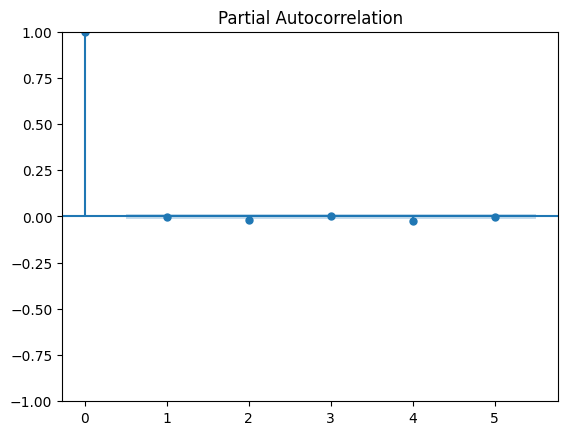

In [122]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_returns['BTCUSDT'], lags=5)
plt.show()

In [ ]:
for lag in range(1, 20):
    BTCUSDT_series =  = df_returns['BTCUSDT']
    print(f'PACF Lag {lag}: {df_returns["BTCUSDT"].autocorr(lag=lag)}')
    